<a href="https://colab.research.google.com/github/kridtapon/AO-Trend-Momentum/blob/main/AO_Trend_Momentum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install vectorbt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 527.6/527.6 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.7/295.7 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 16.6 MB/s eta 0:00:00


In [2]:
pip install --upgrade yfinance

In [5]:
import numpy as np
import pandas as pd
import yfinance as yf
import vectorbt as vbt
import itertools

# Function to calculate Awesome Oscillator (AO)
def calculate_awesome_oscillator(df, fast_period=5, slow_period=34):
    """
    Calculate Awesome Oscillator (AO).
    AO = SMA(fast_period) - SMA(slow_period)
    """
    fast_sma = df['Close'].rolling(window=fast_period).mean()
    slow_sma = df['Close'].rolling(window=slow_period).mean()
    ao = fast_sma - slow_sma
    return ao

# Function to calculate Moving Average Slope
def calculate_ma_slope(df, ma_period=20):
    """
    Calculate the slope of the moving average.
    """
    ma = df['Close'].rolling(window=ma_period).mean()
    ma_slope = ma.diff()  # The difference between each value and the previous value
    return ma_slope

# Define the stock symbol and time period
symbol = 'TPL'  # Stock symbol
start_date = '2019-01-01'
end_date = '2025-01-01'

# Download the data
df = yf.download(symbol, start=start_date, end=end_date)
df.columns = ['Close', 'High', 'Low', 'Open', 'Volume']

# Function to backtest strategy with given parameters
def backtest_strategy(fast_period, slow_period, ma_period):
    df['AO'] = calculate_awesome_oscillator(df, fast_period, slow_period)
    df['MA_Slope'] = calculate_ma_slope(df, ma_period)

    # Define Entry and Exit signals based on MA slope and AO
    df['Entry'] = (df['MA_Slope'] > 0) & (df['AO'] > 0)  # Buy when MA slope is positive and AO crosses above zero
    df['Exit'] = (df['MA_Slope'] < 0) & (df['AO'] < 0)  # Sell when MA slope is negative and AO crosses below zero

    # Filter data for the test period (2020-2025)
    df_test = df[(df.index.year >= 2020) & (df.index.year <= 2025)]

    # Backtest using vectorbt
    portfolio = vbt.Portfolio.from_signals(
        close=df_test['Close'],
        entries=df_test['Entry'],
        exits=df_test['Exit'],
        init_cash=100_000,
        fees=0.001
    )
    return portfolio

# Parameter ranges
fast_period_range = range(5, 21)  # Range for fast period of AO (5 to 20)
slow_period_range = range(30, 51)  # Range for slow period of AO (30 to 50)
ma_period_range = range(10, 31)  # Range for MA slope period (10 to 30)

# Generate all combinations of parameters using itertools.product
param_combinations = itertools.product(fast_period_range, slow_period_range, ma_period_range)

best_total_return = -np.inf
best_params = None
best_portfolio = None

# Loop through all parameter combinations
for fast_period, slow_period, ma_period in param_combinations:
    print(f"Testing fast_period={fast_period}, slow_period={slow_period}, ma_period={ma_period}")
    portfolio = backtest_strategy(fast_period, slow_period, ma_period)
    total_return = portfolio.stats()['Total Return [%]']

    # Keep track of the best parameters based on Total Return
    if total_return > best_total_return:
        best_total_return = total_return
        best_params = (fast_period, slow_period, ma_period)
        best_portfolio = portfolio

# Display the best parameters and the corresponding performance
print(f"Best parameters: {best_params}")
print(f"Best Total Return: {best_total_return}")
best_portfolio.plot().show()


[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.11/dist-packages/vectorbt/generic/stats_builder.py:396: UserWarning:

Metric 'sharpe_ratio' requires frequency to be set

/usr/local/lib/python3.11/dist-packages/vectorbt/generic/stats_builder.py:396: UserWarning:

Metric 'calmar_ratio' requires frequency to be set

/usr/local/lib/python3.11/dist-packages/vectorbt/generic/stats_builder.py:396: UserWarning:

Metric 'omega_ratio' requires frequency to be set

/usr/local/lib/python3.11/dist-packages/vectorbt/generic/stats_builder.py:396: UserWarning:

Metric 'sortino_ratio' requires frequency to be set



Streaming output truncated to the last 5000 lines.
Testing fast_period=9, slow_period=41, ma_period=29
Testing fast_period=9, slow_period=41, ma_period=30
Testing fast_period=9, slow_period=42, ma_period=10
Testing fast_period=9, slow_period=42, ma_period=11
Testing fast_period=9, slow_period=42, ma_period=12
Testing fast_period=9, slow_period=42, ma_period=13
Testing fast_period=9, slow_period=42, ma_period=14
Testing fast_period=9, slow_period=42, ma_period=15
Testing fast_period=9, slow_period=42, ma_period=16
Testing fast_period=9, slow_period=42, ma_period=17
Testing fast_period=9, slow_period=42, ma_period=18
Testing fast_period=9, slow_period=42, ma_period=19
Testing fast_period=9, slow_period=42, ma_period=20
Testing fast_period=9, slow_period=42, ma_period=21
Testing fast_period=9, slow_period=42, ma_period=22
Testing fast_period=9, slow_period=42, ma_period=23
Testing fast_period=9, slow_period=42, ma_period=24
Testing fast_period=9, slow_period=42, ma_period=25
Testing fast_

/usr/local/lib/python3.11/dist-packages/vectorbt/generic/stats_builder.py:396: UserWarning:

Metric 'sharpe_ratio' requires frequency to be set

/usr/local/lib/python3.11/dist-packages/vectorbt/generic/stats_builder.py:396: UserWarning:

Metric 'calmar_ratio' requires frequency to be set

/usr/local/lib/python3.11/dist-packages/vectorbt/generic/stats_builder.py:396: UserWarning:

Metric 'omega_ratio' requires frequency to be set

/usr/local/lib/python3.11/dist-packages/vectorbt/generic/stats_builder.py:396: UserWarning:

Metric 'sortino_ratio' requires frequency to be set



Testing fast_period=20, slow_period=49, ma_period=10
Testing fast_period=20, slow_period=49, ma_period=11
Testing fast_period=20, slow_period=49, ma_period=12
Testing fast_period=20, slow_period=49, ma_period=13
Testing fast_period=20, slow_period=49, ma_period=14
Testing fast_period=20, slow_period=49, ma_period=15
Testing fast_period=20, slow_period=49, ma_period=16
Testing fast_period=20, slow_period=49, ma_period=17
Testing fast_period=20, slow_period=49, ma_period=18
Testing fast_period=20, slow_period=49, ma_period=19
Testing fast_period=20, slow_period=49, ma_period=20
Testing fast_period=20, slow_period=49, ma_period=21
Testing fast_period=20, slow_period=49, ma_period=22
Testing fast_period=20, slow_period=49, ma_period=23
Testing fast_period=20, slow_period=49, ma_period=24
Testing fast_period=20, slow_period=49, ma_period=25
Testing fast_period=20, slow_period=49, ma_period=26
Testing fast_period=20, slow_period=49, ma_period=27
Testing fast_period=20, slow_period=49, ma_per

[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.11/dist-packages/vectorbt/generic/stats_builder.py:396: UserWarning:

Metric 'sharpe_ratio' requires frequency to be set

/usr/local/lib/python3.11/dist-packages/vectorbt/generic/stats_builder.py:396: UserWarning:

Metric 'calmar_ratio' requires frequency to be set

/usr/local/lib/python3.11/dist-packages/vectorbt/generic/stats_builder.py:396: UserWarning:

Metric 'omega_ratio' requires frequency to be set

/usr/local/lib/python3.11/dist-packages/vectorbt/generic/stats_builder.py:396: UserWarning:

Metric 'sortino_ratio' requires frequency to be set



Streaming output truncated to the last 5000 lines.
Testing fast_period=9, slow_period=44, ma_period=10
Testing fast_period=9, slow_period=44, ma_period=11
Testing fast_period=9, slow_period=44, ma_period=12
Testing fast_period=9, slow_period=44, ma_period=13
Testing fast_period=9, slow_period=44, ma_period=14
Testing fast_period=9, slow_period=44, ma_period=15
Testing fast_period=9, slow_period=44, ma_period=16
Testing fast_period=9, slow_period=44, ma_period=17
Testing fast_period=9, slow_period=44, ma_period=18
Testing fast_period=9, slow_period=44, ma_period=19
Testing fast_period=9, slow_period=44, ma_period=20
Testing fast_period=9, slow_period=44, ma_period=21
Testing fast_period=9, slow_period=44, ma_period=22
Testing fast_period=9, slow_period=44, ma_period=23
Testing fast_period=9, slow_period=44, ma_period=24
Testing fast_period=9, slow_period=44, ma_period=25
Testing fast_period=9, slow_period=44, ma_period=26
Testing fast_period=9, slow_period=44, ma_period=27
Testing fast_

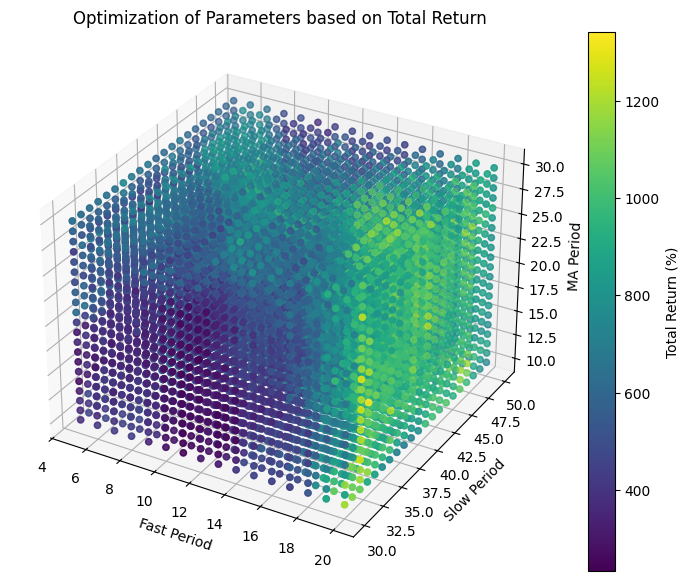

In [6]:
import numpy as np
import pandas as pd
import yfinance as yf
import vectorbt as vbt
import itertools
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Function to calculate Awesome Oscillator (AO)
def calculate_awesome_oscillator(df, fast_period=5, slow_period=34):
    """
    Calculate Awesome Oscillator (AO).
    AO = SMA(fast_period) - SMA(slow_period)
    """
    fast_sma = df['Close'].rolling(window=fast_period).mean()
    slow_sma = df['Close'].rolling(window=slow_period).mean()
    ao = fast_sma - slow_sma
    return ao

# Function to calculate Moving Average Slope
def calculate_ma_slope(df, ma_period=20):
    """
    Calculate the slope of the moving average.
    """
    ma = df['Close'].rolling(window=ma_period).mean()
    ma_slope = ma.diff()  # The difference between each value and the previous value
    return ma_slope

# Define the stock symbol and time period
symbol = 'TPL'  # Stock symbol
start_date = '2019-01-01'
end_date = '2025-01-01'

# Download the data
df = yf.download(symbol, start=start_date, end=end_date)
df.columns = ['Close', 'High', 'Low', 'Open', 'Volume']

# Function to backtest strategy with given parameters
def backtest_strategy(fast_period, slow_period, ma_period):
    df['AO'] = calculate_awesome_oscillator(df, fast_period, slow_period)
    df['MA_Slope'] = calculate_ma_slope(df, ma_period)

    # Define Entry and Exit signals based on MA slope and AO
    df['Entry'] = (df['MA_Slope'] > 0) & (df['AO'] > 0)  # Buy when MA slope is positive and AO crosses above zero
    df['Exit'] = (df['MA_Slope'] < 0) & (df['AO'] < 0)  # Sell when MA slope is negative and AO crosses below zero

    # Filter data for the test period (2020-2025)
    df_test = df[(df.index.year >= 2020) & (df.index.year <= 2025)]

    # Backtest using vectorbt
    portfolio = vbt.Portfolio.from_signals(
        close=df_test['Close'],
        entries=df_test['Entry'],
        exits=df_test['Exit'],
        init_cash=100_000,
        fees=0.001
    )
    return portfolio

# Parameter ranges
fast_period_range = range(5, 21)  # Range for fast period of AO (5 to 20)
slow_period_range = range(30, 51)  # Range for slow period of AO (30 to 50)
ma_period_range = range(10, 31)  # Range for MA slope period (10 to 30)

# Generate all combinations of parameters using itertools.product
param_combinations = itertools.product(fast_period_range, slow_period_range, ma_period_range)

# Lists to store parameter values and corresponding total returns
fast_periods = []
slow_periods = []
ma_periods = []
total_returns = []

# Loop through all parameter combinations
for fast_period, slow_period, ma_period in param_combinations:
    print(f"Testing fast_period={fast_period}, slow_period={slow_period}, ma_period={ma_period}")
    portfolio = backtest_strategy(fast_period, slow_period, ma_period)
    total_return = portfolio.stats()['Total Return [%]']

    # Append the parameter values and corresponding total return to the lists
    fast_periods.append(fast_period)
    slow_periods.append(slow_period)
    ma_periods.append(ma_period)
    total_returns.append(total_return)

# Convert lists to numpy arrays for easy plotting
fast_periods = np.array(fast_periods)
slow_periods = np.array(slow_periods)
ma_periods = np.array(ma_periods)
total_returns = np.array(total_returns)

# Find the best parameters based on Total Return
best_total_return_idx = np.argmax(total_returns)
best_params = (fast_periods[best_total_return_idx], slow_periods[best_total_return_idx], ma_periods[best_total_return_idx])
best_total_return = total_returns[best_total_return_idx]

# Display the best parameters and the corresponding performance
print(f"Best parameters: {best_params}")
print(f"Best Total Return: {best_total_return}")

# 3D plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(fast_periods, slow_periods, ma_periods, c=total_returns, cmap='viridis', marker='o')

ax.set_xlabel('Fast Period')
ax.set_ylabel('Slow Period')
ax.set_zlabel('MA Period')
ax.set_title('Optimization of Parameters based on Total Return')

plt.colorbar(ax.scatter(fast_periods, slow_periods, ma_periods, c=total_returns, cmap='viridis'), ax=ax, label='Total Return (%)')
plt.show()

# Optionally, plot the best portfolio's equity curve
best_portfolio = backtest_strategy(*best_params)
best_portfolio.plot().show()
print(best_portfolio.stats())

In [8]:
print(best_portfolio.stats())

Start                         2020-01-02 00:00:00
End                           2024-12-31 00:00:00
Period                                       1258
Start Value                              100000.0
End Value                          1441828.393153
Total Return [%]                      1341.828393
Benchmark Return [%]                   370.656071
Max Gross Exposure [%]                      100.0
Total Fees Paid                       10693.32186
Max Drawdown [%]                        36.564894
Max Drawdown Duration                       220.0
Total Trades                                   13
Total Closed Trades                            13
Total Open Trades                               0
Open Trade PnL                                0.0
Win Rate [%]                            61.538462
Best Trade [%]                         224.287888
Worst Trade [%]                         -13.20562
Avg Winning Trade [%]                   58.174853
Avg Losing Trade [%]                    -6.758167


/usr/local/lib/python3.11/dist-packages/vectorbt/generic/stats_builder.py:396: UserWarning:

Metric 'sharpe_ratio' requires frequency to be set

/usr/local/lib/python3.11/dist-packages/vectorbt/generic/stats_builder.py:396: UserWarning:

Metric 'calmar_ratio' requires frequency to be set

/usr/local/lib/python3.11/dist-packages/vectorbt/generic/stats_builder.py:396: UserWarning:

Metric 'omega_ratio' requires frequency to be set

/usr/local/lib/python3.11/dist-packages/vectorbt/generic/stats_builder.py:396: UserWarning:

Metric 'sortino_ratio' requires frequency to be set



In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import vectorbt as vbt

# Function to calculate Awesome Oscillator (AO)
def calculate_awesome_oscillator(df, fast_period=5, slow_period=34):
    """
    Calculate Awesome Oscillator (AO).
    AO = SMA(5) - SMA(34)
    """
    fast_sma = df['Close'].rolling(window=fast_period).mean()
    slow_sma = df['Close'].rolling(window=slow_period).mean()
    ao = fast_sma - slow_sma
    return ao

# Function to calculate Moving Average Slope
def calculate_ma_slope(df, ma_period=20):
    """
    Calculate the slope of the moving average.
    """
    ma = df['Close'].rolling(window=ma_period).mean()
    ma_slope = ma.diff()  # The difference between each value and the previous value
    return ma_slope

# Define the stock symbol and time period
symbol = 'META'  # SPY is the symbol for the S&P 500 ETF
start_date = '2019-01-01'
end_date = '2025-01-01'

# Download the data
df = yf.download(symbol, start=start_date, end=end_date)
df.columns = ['Close', 'High', 'Low', 'Open', 'Volume']

# Calculate Awesome Oscillator (AO)
df['AO'] = calculate_awesome_oscillator(df)

# Calculate Moving Average Slope (20-period MA)
df['MA_Slope'] = calculate_ma_slope(df)

# Define Entry and Exit signals based on MA slope and AO
df['Entry'] = (df['MA_Slope'] > 0) & (df['AO'] > 0)  # Buy when MA slope is positive and AO crosses above zero
df['Exit'] = (df['MA_Slope'] < 0) & (df['AO'] < 0)  # Sell when MA slope is negative and AO crosses below zero

# Filter data for the test period (2020-2025)
df = df[(df.index.year >= 2020) & (df.index.year <= 2025)]

# Backtest using vectorbt
portfolio = vbt.Portfolio.from_signals(
    close=df['Close'],
    entries=df['Entry'],
    exits=df['Exit'],
    init_cash=100_000,
    fees=0.001
)

# Display performance metrics
print(portfolio.stats())

# Plot equity curve
portfolio.plot().show()


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.11/dist-packages/vectorbt/generic/stats_builder.py:396: UserWarning: Metric 'sharpe_ratio' requires frequency to be set
  warnings.warn(warning_message)
/usr/local/lib/python3.11/dist-packages/vectorbt/generic/stats_builder.py:396: UserWarning: Metric 'calmar_ratio' requires frequency to be set
  warnings.warn(warning_message)
/usr/local/lib/python3.11/dist-packages/vectorbt/generic/stats_builder.py:396: UserWarning: Metric 'omega_ratio' requires frequency to be set
  warnings.warn(warning_message)
/usr/local/lib/python3.11/dist-packages/vectorbt/generic/stats_builder.py:396: UserWarning: Metric 'sortino_ratio' requires frequency to be set
  warnings.warn(warning_message)


Start                         2020-01-02 00:00:00
End                           2024-12-31 00:00:00
Period                                       1258
Start Value                              100000.0
End Value                              346684.866
Total Return [%]                       246.684866
Benchmark Return [%]                   180.172876
Max Gross Exposure [%]                      100.0
Total Fees Paid                       7113.990003
Max Drawdown [%]                        39.962067
Max Drawdown Duration                       356.0
Total Trades                                   21
Total Closed Trades                            20
Total Open Trades                               1
Open Trade PnL                       -4402.068392
Win Rate [%]                                 30.0
Best Trade [%]                          144.00139
Worst Trade [%]                        -12.444122
Avg Winning Trade [%]                   44.546758
Avg Losing Trade [%]                     -4.72537
